# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

Mean Squared Error: 3439.6239194063787
Next 30 days predicted prices:
            Predicted_Close
2024-06-22      1051.529378
2024-06-23      1052.978929
2024-06-24      1054.428479
2024-06-25      1055.878030
2024-06-26      1057.327581
2024-06-27      1058.777132
2024-06-28      1060.226682
2024-06-29      1061.676233
2024-06-30      1063.125784
2024-07-01      1064.575335
2024-07-02      1066.024885
2024-07-03      1067.474436
2024-07-04      1068.923987
2024-07-05      1070.373538
2024-07-06      1071.823088
2024-07-07      1073.272639
2024-07-08      1074.722190
2024-07-09      1076.171740
2024-07-10      1077.621291
2024-07-11      1079.070842
2024-07-12      1080.520393
2024-07-13      1081.969943
2024-07-14      1083.419494
2024-07-15      1084.869045
2024-07-16      1086.318596
2024-07-17      1087.768146
2024-07-18      1089.217697
2024-07-19      1090.667248
2024-07-20      1092.116799
2024-07-21      1093.566349


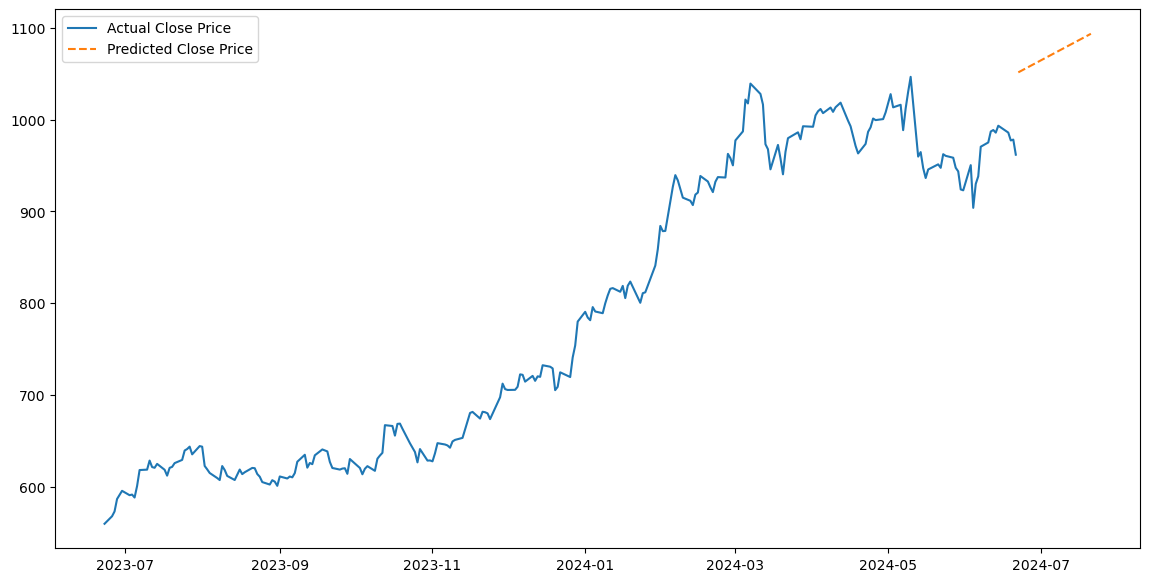

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data from CSV
def load_data(csv_file):
    stock_data = pd.read_csv(csv_file)
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date', inplace=True)
    stock_data = stock_data[['Close']]
    stock_data = stock_data.dropna()
    return stock_data

# Prepare the dataset
def prepare_data(stock_data):
    X = np.array(stock_data.index.map(pd.Timestamp.toordinal)).reshape(-1, 1)
    y = np.array(stock_data['Close'])
    return X, y

# Train and evaluate the model
def train_and_evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')
    return model

# Make future predictions
def make_predictions(stock_data, model, days=30):
    last_date = stock_data.index[-1]
    future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, days + 1)]
    future_dates_ordinals = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)
    future_predictions = model.predict(future_dates_ordinals)
    future_data = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])
    return future_data

# Plot the results
def plot_results(stock_data, future_data):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='Actual Close Price')
    plt.plot(future_data['Predicted_Close'], label='Predicted Close Price', linestyle='--')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    csv_file = "TATAMOTORS.NS.csv"  # Replace with your CSV file path
    stock_data = load_data(csv_file)
    X, y = prepare_data(stock_data)
    model = train_and_evaluate_model(X, y)
    future_data = make_predictions(stock_data, model, days=30)
    
    # Print future predictions
    print("Next 30 days predicted prices:")
    print(future_data)
    
    plot_results(stock_data, future_data)
